## Verificación del entorno de ejecución
Antes de comenzar, es importante asegurarse de que nuestro entorno de trabajo esté correctamente configurado. 
Aquí, verificamos si CUDA está disponible para aprovechar la GPU y obtener un rendimiento óptimo al trabajar con modelos de deep learning.


In [1]:
import torch
print("Is CUDA available? ", torch.cuda.is_available())
print("Device name: ", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

Is CUDA available?  True
Device name:  NVIDIA GeForce RTX 4070 Laptop GPU


# Introducción a Ultralytics y YOLOv8
YOLO (You Only Look Once) es un popular modelo de detección de objetos y segmentación de imágenes desarrollado por Joseph Redmon y Ali Farhadi en la Universidad de
Washington. Lanzado en 2015, YOLO ganó popularidad rápidamente por su gran velocidad y precisión. A diferencia de otros métodos que dividen la imagen en partes y aplican un modelo de detección en cada una, YOLO procesa la imagen completa en una sola instancia, lo que lo hace rápido y eficiente. Aunque YOLO comenzó como un único modelo, ha evolucionado con el tiempo, generando diversas versiones y consolidándose como una familia de modelos. 

**¿Por qué YOLOv8?**

Actualmente, YOLOv8 es la última versión completa desarrollada por Ultralytics. Pero además de que YOLO haya nacido con un enfoque en la detección, YOLOv8 es un framerwork que soporta multiples tareas de visión computacional. Aunque en 2024 se han publicado dos nuevas versiones de YOLO, YOLOv9 y YOLOv10, estas versiones aún están en desarrollo y no poseen todas las implementaciones que actualmente tiene YOLOv8, como por ejemplo la integración con tracking.

**Tareas que puede realizar YOLO**

YOLOv8 se puede utilizar para tareas de:

- Clasificación
- Detección
- Tracking
- Segmentación
- Estimación de pose





In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

# 1. Clasificación
En esta sección, utilizaremos el modelo YOLOv8 para realizar la tarea de clasificación de imágenes. Este modelo fue entrenado con ImageNet, por lo que contiene 1.000 clases distintas.

In [35]:
# Se carga el modelo
model = YOLO("yolov8n-cls.pt")  

# Se predice en una imagen
results = model("data\\Rocky.jpg")  

# Visualizar el resultado de la detección
results[0].show()


image 1/1 c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\Rocky.jpg: 224x224 Irish_setter 0.31, Afghan_hound 0.13, golden_retriever 0.12, cocker_spaniel 0.11, Sussex_spaniel 0.09, 7.1ms
Speed: 45.7ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


Los resultados se entregan como una lista de resultados, dado que YOLO acepta distintos formatos de archivos para procesar. Para observar y acceder a los resultados específicos de una imagen, debemos utilizar `results[0]`.

In [4]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_cr

Además, es posible acceder individualmente a los resultados que se entregan y trabajar con ellos.

In [36]:
# Obtener los nombres de las clases y sus probabilidades
names = results[0].names
probs = results[0].probs

# Obtener los índices de las 3 clases con mayor probabilidad
top_3_indices = probs.top5[:3]

# Mostrar las 3 clases con mayor probabilidad
for i in top_3_indices:
    print(f"Clase: {names[i]}, Probabilidad: {probs.data[i]:.4f}")


Clase: Irish_setter, Probabilidad: 0.3106
Clase: Afghan_hound, Probabilidad: 0.1264
Clase: golden_retriever, Probabilidad: 0.1217


# 2. Detección
Los modelos de detección de YOLOv8 fueron entrenados con COCO, por lo que es capaz de detectar 80 clases distintas.

In [37]:
# Se carga el modelo
model = YOLO("models\\yolov8n.pt")  

# Se predice en una imagen
results = model("data\\bus.jpg") 

# Visualizar el resultado de la detección
results[0].show()


image 1/1 c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 23.0ms
Speed: 4.0ms preprocess, 23.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


Además de visualizar los resultados en una ventana emergente con `.show()`, es posible observar las detecciones con matplotlib.

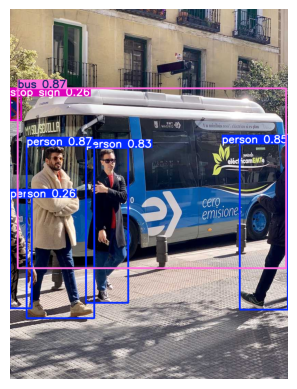

In [38]:
# Obtener la imagen con las detecciones
img = results[0].plot()

# Convertir de BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen en el notebook
plt.imshow(img_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()


Los resultados especificos de las detecciones de pueden observar dentro de `results[0].boxes`.

In [29]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5.,  0.,  0.,  0.,  0., 11.], device='cuda:0')
conf: tensor([0.8733, 0.8657, 0.8529, 0.8254, 0.2608, 0.2560], device='cuda:0')
data: tensor([[2.2862e+01, 2.3128e+02, 8.0499e+02, 7.5684e+02, 8.7332e-01, 5.0000e+00],
        [4.8551e+01, 3.9855e+02, 2.4535e+02, 9.0271e+02, 8.6571e-01, 0.0000e+00],
        [6.6947e+02, 3.9218e+02, 8.0972e+02, 8.7703e+02, 8.5286e-01, 0.0000e+00],
        [2.2151e+02, 4.0580e+02, 3.4498e+02, 8.5755e+02, 8.2535e-01, 0.0000e+00],
        [0.0000e+00, 5.5052e+02, 6.3032e+01, 8.7343e+02, 2.6082e-01, 0.0000e+00],
        [5.8235e-02, 2.5446e+02, 3.2559e+01, 3.2487e+02, 2.5599e-01, 1.1000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[413.9274, 494.0614, 782.1302, 525.5659],
        [146.9504, 650.6297, 196.7980, 504.1612],
        [739.5955, 634.6046, 140.2491, 484.8511],
        [283.2463, 631.6735, 123.4639, 451.7487],
    

En donde se observan algunos parámetros interesantes (notar que todos son del tipo tensor):

1. `cls:` contiene las clases de cada detección.
2. `xyxy:` contiene los bounding box de cada detección. Cada bboxestá definido de acuerdo a las coordenadas de sus 4 esquinas.
3. `conf:` corresponde a la confianza con la que el modelo detecta cada clase.

Como la clasificación de cada detección está dada de acuerdo a los Id's de las clases, para acceder a los nombres respectivos se puede utilizar `results[0].names`.

In [30]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Es posible trabajar con los resultados de las detecciones. Por ejmplo, se pueden filtrar las detecciones estableciendo un umbral de confianza.

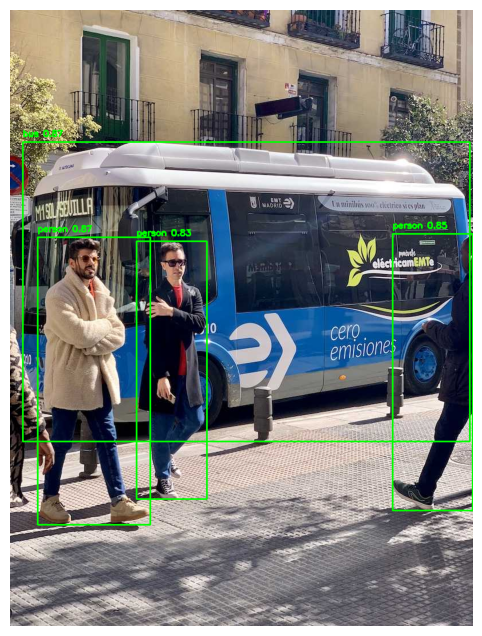

In [39]:
# Filtrar las detecciones por confianza (> 0.8)
filtered_boxes = []
for i, box in enumerate(results[0].boxes):
    if box.conf > 0.8:
        filtered_boxes.append(box)

# Crear una copia de la imagen original para dibujar las detecciones filtradas
img = results[0].orig_img.copy()

# Dibujar las detecciones filtradas
for box in filtered_boxes:
    x1, y1, x2, y2 = map(int, box.xyxy.cpu().numpy().flatten())
    class_id = int(box.cls.item())  # Convertir box.cls a entero
    confidence = float(box.conf.item())  # Convertir box.conf a float
    label = f'{results[0].names[class_id]} {confidence:.2f}'
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Mostrar la imagen con las detecciones filtradas en un tamaño mayor
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura (ancho, alto)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



# 3. Tracking

Existen modelos desarrollados para realizar el tracking de objetos en videos, pero uno de los puntos fuertes de YOLOv8 es que posee una implementación directa de tracking sin la necesidad de entrenar o cargar un nuevo modelo. Utilizando únicamente un modelo de detección basado en YOLOv8, es posible realizar el tracking con `model.track`.

In [40]:
# Se carga el modelo
model = YOLO("models\\yolov8n.pt")  

# Se predice en una imagen
results = model.track("data\\bus.jpg")  

# Visualizar el resultado de la detección
results[0].show()


image 1/1 c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\bus.jpg: 640x480 3 persons, 1 bus, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Al observar los resultados de la detección, se observa que `id` posee el Id específico del tracking asociado a cada objeto detectado.

In [41]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0.])
conf: tensor([0.8733, 0.8657, 0.8529, 0.8254])
data: tensor([[2.2862e+01, 2.3128e+02, 8.0499e+02, 7.5684e+02, 1.0000e+00, 8.7332e-01, 5.0000e+00],
        [4.8551e+01, 3.9855e+02, 2.4535e+02, 9.0271e+02, 2.0000e+00, 8.6571e-01, 0.0000e+00],
        [6.6947e+02, 3.9218e+02, 8.0972e+02, 8.7703e+02, 3.0000e+00, 8.5286e-01, 0.0000e+00],
        [2.2151e+02, 4.0580e+02, 3.4498e+02, 8.5755e+02, 4.0000e+00, 8.2535e-01, 0.0000e+00]])
id: tensor([1., 2., 3., 4.])
is_track: True
orig_shape: (1080, 810)
shape: torch.Size([4, 7])
xywh: tensor([[413.9274, 494.0614, 782.1302, 525.5659],
        [146.9504, 650.6297, 196.7980, 504.1613],
        [739.5955, 634.6046, 140.2491, 484.8511],
        [283.2463, 631.6735, 123.4639, 451.7487]])
xywhn: tensor([[0.5110, 0.4575, 0.9656, 0.4866],
        [0.1814, 0.6024, 0.2430, 0.4668],
        [0.9131, 0.5876, 0.1731, 0.4489],
        [0.3497, 0.5849, 0.1524, 0.4183]])
xyxy:

# 4. Segmentación

El modelo de segmentación de YOLOv8 funciona de manera similar a los otros modelos de YOLO, pero en lugar de simplemente detectar y clasificar objetos, también predice una máscara binaria para cada objeto detectado, lo que permite segmentar el objeto dentro de la imagen. Tal como el modelo de detección, también está entrenado con COCO, por lo que es capaz de detectar 80 clases distintas.

In [42]:
# Se carga el modelo
model = YOLO("models\\yolov8n-seg.pt") 

# Se predice en una imagen
results = model("data\\bus.jpg")  

# Visualizar el resultado de la detección
results[0].show()


image 1/1 c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 28.5ms
Speed: 2.0ms preprocess, 28.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Dentro de los resultados, es posible acceder a la información de las máscaras por medio de `results[0].masks`.

In [43]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

En donde `data` Contiene las máscaras binarizadas de los objetos detectados. Cada máscara es una matriz 2D donde los píxeles que pertenecen al objeto tienen un valor de 1, y los píxeles de fondo tienen un valor de 0. Cada objeto detectado tiene su propia máscara en esta lista.

Es posible trabajar con estos resultados. Por ejemplo, a continuación se observa de manera individual cada máscara detectada.

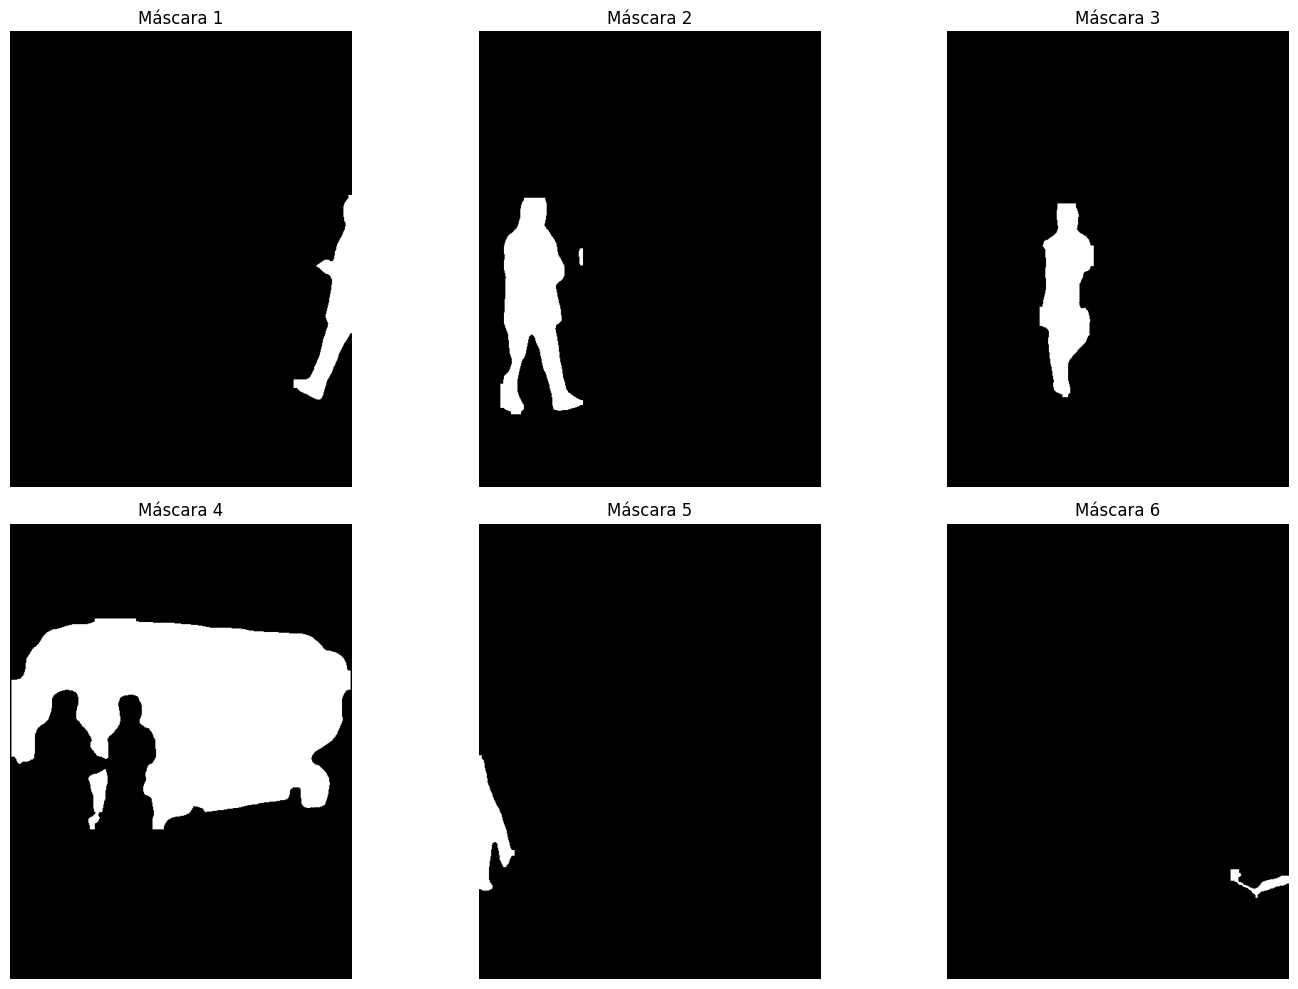

In [44]:
# Obtener la primera predicción
prediction = results[0]

# Acceder a las máscaras de segmentación
masks = prediction.masks.data  # Esta es una lista de máscaras para cada objeto detectado

# Definir la cantidad de máscaras a mostrar por fila
n_masks = len(masks)
cols = min(n_masks, 3)  # Número de columnas 
rows = (n_masks + cols - 1) // cols  # Número de filas necesario

# Crear una figura con subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

# Asegurarse de que `axes` es un array, incluso si hay una sola fila o columna
axes = axes.flatten() if n_masks > 1 else [axes]

# Iterar y mostrar cada máscara en su subplot correspondiente
for i, mask in enumerate(masks):
    mask_np = mask.cpu().numpy()
    axes[i].imshow(mask_np, cmap='gray')
    axes[i].set_title(f'Máscara {i+1}')
    axes[i].axis('off')

# Eliminar los subplots vacíos si hay menos máscaras que subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


En base al modelo de segmentación, podríamos utilizar la máscara para separar específicamente un objeto de la imagen.

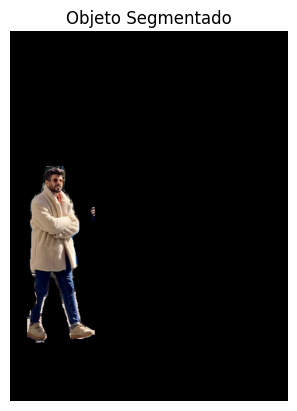

In [16]:
# Obtener la primera predicción
prediction = results[0]

# Acceder a una máscara específica (por ejemplo, la primera)
mask = prediction.masks.data[1].cpu().numpy()

# Convertir la máscara a uint8 y asegurar que tenga las mismas dimensiones que la imagen original
mask_uint8 = (mask * 255).astype(np.uint8)
mask_resized = cv2.resize(mask_uint8, (prediction.orig_img.shape[1], prediction.orig_img.shape[0]))

# Aplicar la máscara a la imagen original para extraer el objeto
segmented_object = cv2.bitwise_and(prediction.orig_img, prediction.orig_img, mask=mask_resized)

# Mostrar el objeto segmentado
plt.imshow(cv2.cvtColor(segmented_object, cv2.COLOR_BGR2RGB))
plt.title('Objeto Segmentado')
plt.axis('off')
plt.show()


Aprovechando este resultado, es posible tomar el objeto de una imagen y posicionarlo en otra, como se observa en el siguiente ejemplo.

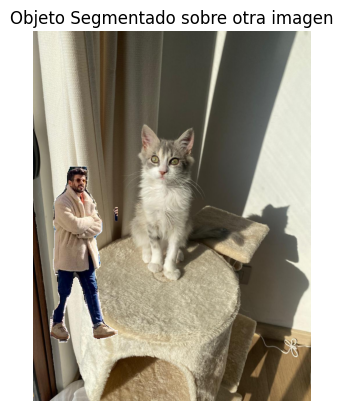

In [17]:
# Obtener la primera predicción
prediction = results[0]

# Acceder a una máscara específica (por ejemplo, la primera)
mask = prediction.masks.data[1].cpu().numpy()

# Convertir la máscara a uint8 y asegurar que tenga las mismas dimensiones que la imagen original
mask_uint8 = (mask * 255).astype(np.uint8)
mask_resized = cv2.resize(mask_uint8, (prediction.orig_img.shape[1], prediction.orig_img.shape[0]))

# Aplicar la máscara a la imagen original para extraer el objeto
segmented_object = cv2.bitwise_and(prediction.orig_img, prediction.orig_img, mask=mask_resized)

# Cargar una imagen de fondo
background = cv2.imread('data\\Emma.png')

# Asegurarse de que la imagen de fondo tiene el mismo tamaño que la imagen original
background_resized = cv2.resize(background, (prediction.orig_img.shape[1], prediction.orig_img.shape[0]))

# Invertir la máscara para poder colocar el objeto segmentado sobre el fondo
mask_inv = cv2.bitwise_not(mask_resized)

# Preparar la región del fondo donde se colocará el objeto (eliminar la región del objeto)
background_region = cv2.bitwise_and(background_resized, background_resized, mask=mask_inv)

# Colocar el objeto segmentado sobre la imagen de fondo
final_image = cv2.add(background_region, segmented_object)

# Mostrar la imagen final
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Objeto Segmentado sobre otra imagen')
plt.axis('off')
plt.show()


# 5. Estimación de poses

El modelo de estimación de poses de YOLOv8 está entrenado para detectar únicamente los keypoints de una persona. Específicamente son 17 los keypoints:

1. Nariz
2. Ojo izquierdo
3. Ojo derecho
4. Oreja izquierda
5. Oreja derecha
6. Hombro izquierdo
7. Hombro derecho
8. Codo izquierdo
9. Codo derecho
10. Muñeca izquierda
11. Muñeca derecha
12. Cadera izquierda
13. Cadera derecha
14. Rodilla izquierda
15. Rodilla derecha
16. Tobillo izquierdo
17. Tobillo derecho


In [45]:
# Se carga el modelo
model = YOLO("models\\yolov8n-pose.pt")  
# Se predice en una imagen
results = model("data\\bus.jpg") 

# Visualizar el resultado de la detección
results[0].show()


image 1/1 c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\bus.jpg: 640x480 4 persons, 23.7ms
Speed: 2.0ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Para acceder específicamente a las coordenadas de cada keypoint de una persona, utilizamos `results[0].keypoints.xy`.

In [19]:
results[0].keypoints.xy

tensor([[[143.7561, 443.4929],
         [149.0511, 435.1379],
         [133.6920, 434.6770],
         [  0.0000,   0.0000],
         [107.2815, 438.9878],
         [163.1810, 494.3175],
         [ 88.7264, 496.4189],
         [191.3262, 561.5746],
         [115.6945, 572.1413],
         [157.3844, 537.5732],
         [149.4957, 565.2518],
         [156.1751, 641.1768],
         [ 98.2169, 642.7543],
         [182.1558, 750.7729],
         [ 90.4694, 759.1087],
         [189.2793, 852.2266],
         [ 72.5818, 866.9703]],

        [[  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [805.3454, 487.0004],
         [  0.0000,   0.0000],
         [789.5997, 562.1330],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [  0.0000,   0.0000],
         [803.5366, 644.9959],
         [804.8278, 641.7266],
         [766.9227, 738.1056],
         [770.2912, 739.5490],
      

Es posible trabajar con los resultados que se obtienen de la estimación de poses. Por ejemplo, se pueden tomar los keypoints de la cadera, hombro y codo para calcular el ángulo de extensión del brazo.

In [20]:
# Obtener la primera predicción
pose_data = results[0]

# Obtener las coordenadas de los puntos clave para el brazo derecho de la primera persona (índice 0)
hip = pose_data.keypoints.xy[0][11].cpu().numpy().flatten()  # Cadera derecha
shoulder = pose_data.keypoints.xy[0][5].cpu().numpy().flatten()  # Hombro derecho
elbow = pose_data.keypoints.xy[0][7].cpu().numpy().flatten()  # Codo derecho

# Calcular los vectores del brazo superior (cadera a hombro) y del antebrazo (hombro a codo)
vector1 = shoulder - hip
vector2 = elbow - shoulder

# Calcular el ángulo entre los vectores usando el producto punto y la norma
cos_theta = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
angle = np.arccos(cos_theta)

# Convertir el ángulo de radianes a grados
angle_degrees = np.degrees(angle)

print(f"El ángulo de extensión del brazo derecho es: {angle_degrees:.2f} grados")

El ángulo de extensión del brazo derecho es: 154.56 grados


# 5. Procesamiento de un video

YOLO puede procesar directamente video, de la misma manera en la que se realizó previamente. Se pueden usar los parámetros `show = True` y `save = True` al predecir para visualizar y guardar los resultados.

- Fuente: https://www.youtube.com/watch?v=mxDs2zY75RA

In [46]:
# Se carga el modelo
model = YOLO("models\\yolov8n.pt")  

# Se predice en una imagen
results = model("data\\perro_jugando_futbol.mp4", show = True, save = True)  



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/327) c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\perro_jugando_futbol.mp4: 384x640 1 person, 1 dog, 16.1ms
video 1/1 (frame 2/327) c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\perro_jugando_futbol.mp4: 384x640 1 person, 1 dog, 14.4ms
video 1/1 (frame 3/327) c:\Users\fabio\OneDrive\Documentos\Hackaton 2024\data\perro_jugando_futbol.mp4: 384x640 1 person, 1 dog, 15.0ms
video 1/1 (frame 4/327) c:\Users\fabio\OneDrive\Do

Esto permite procesar un video utilizando un modelo, pero no permite trabajar directamente con los resultados de las detecciones. Para trabajar con las detecciones y generar aplicaciones y/desarrollos basados en los resultados de un modelo, se debe proceder de otra manera.

Primero, se definen dos funciones: una para dibujar los bounding boxes dentro de un frame y otra para dibujar una alerta en un frame.

In [22]:
# Función para dibujar las cajas delimitadoras y texto
def dibujar_cajas(frame, boxes, names):
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy.cpu().numpy().flatten()
        label = names[int(box.cls.item())]
        if box.id is not None:
            tracker_id = int(box.id.item())
            label = f"{tracker_id}: {label}"
        # Colores personalizados por tipo de etiqueta
        if label == 'person':
            color = (0, 255, 0)  # Verde
        elif label == 'dog':
            color = (0, 0, 255)  # Rojo
        else:
            color = (255, 255, 0)  # cyan
        # label = str(tracker_id) + ": " + label
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        cv2.putText(frame, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_TRIPLEX, 0.6, color, 2)

# Función para dibujar una alerta de texto en la esquina superior izquierda de un frame
def dibujar_alert_text(frame, alert_text):
    # Dibuja el texto de alerta con fondo de color y letras blancas
    cv2.rectangle(frame, (5, 5), (750, 40), (18, 10, 143), -1)
    cv2.putText(frame, alert_text, (10, 30), cv2.FONT_HERSHEY_TRIPLEX, 0.7, (255, 255, 255), 2)


Posteriormente, se define una función que recibe un modelo y la ruta de un video para procesarlo y calcular la distancia entre personas y perros, generando una alerta cuando un perro se encuentra a una determinada distancia de una persona.

Para esto, se utiliza YOLO en conjunto con OpenCV, ya que la función `cv2.VideoCapture` permite procesar un video frame por frame. De esta manera, es posible "abrir" un video y trabajar individualmente con los resultados obtenidos en las detecciones de cada uno de los frames que lo componen.

- Observación: Notar que en la siguiente función se han usado algunas prácticas que podrían ser de utilidad en sistmas que requieren procesar a tiempo real, como lo son la disminución del tamaño de los frames, procesar solo los frames impares y usar umbrales de confianza en las detecciones.

In [47]:
def detectar_distancias(model, nombre_video):
    # Inicializa la captura de video desde el archivo especificado
    cap = cv2.VideoCapture(nombre_video)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

    print(f"Procesando video {os.path.basename(nombre_video)}")
    new_resolution = (1280, 720)  # Nueva resolución

    frame_id = 0
     # Bucle que continúa hasta que se haya procesado todo el video
    while cap.isOpened():
        frame_id += 1
        # Procesar solo los frames impares o el último frame del video
        if (frame_id % 2 == 0) or (frame_id == total_frames):
            cap.grab()
            continue
        
        ret, frame = cap.read()
        if not ret: # Si no se pudo leer el frame, sale del bucle
            break
        
        # Cambia la resolución del frame al tamaño especificado
        frame = cv2.resize(frame, new_resolution)

        # Realiza el seguimiento de los objetos en el frame usando el modelo
        results = model.track(frame, verbose=False, persist=True)[0]
        boxes = results.boxes

        # Listas para almacenar los resultados por clase
        people = []
        dogs = []

        # Iteramos sobre todas las detecciones en el frame
        for box in boxes:
            try:
                # Obtiene el nombre de la clase y la confianza de la detección
                class_name = results.names[int(box.cls.item())]
                confidence = float(box.conf.item())

                # Filtra las detecciones de personas y perros con alta confianza
                if class_name == 'person' and confidence >= 0.5:
                    people.append(box.xyxy[0].cpu().numpy().flatten())
                elif class_name == 'dog' and confidence >= 0.5:
                    dogs.append(box.xyxy[0].cpu().numpy().flatten())

            except Exception as e:
                 # Imprime un mensaje de error si ocurre un problema al procesar una detección
                print(f"Error procesando una caja: {e}")
                pass

        # Calcula la distancia entre cada persona y cada perro detectado
        for person in people:
            person_center = ((int(person[0]) + int(person[2])) // 2, (int(person[1]) + int(person[3])) // 2)
            for dog in dogs:
                dog_center = (int((dog[0]) + int(dog[2])) // 2, (int(dog[1]) + int(dog[3])) // 2)
                distance = np.sqrt((person_center[0] - dog_center[0])**2 + (person_center[1] - dog_center[1])**2)

                # Dibuja una línea entre la persona y el perro y muestra la distancia
                cv2.line(frame, person_center, dog_center, (0, 0, 255), 2)
                cv2.putText(frame, f'Distancia: {distance:.2f} px', (person_center[0], person_center[1] - 60),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                # Si la distancia es menor que el umbral, se genera una alerta
                if distance < 200:
                    alert_text = "Perro muy cerca de una persona"
                    dibujar_alert_text(frame, alert_text)

        # Si hay resultados, dibuja las cajas y etiquetas en el frame
        if results is not None or len(results.boxes) != 0:
            dibujar_cajas(frame, results.boxes, results.names)

        # Muestra el frame con las detecciones y la información sobre la distancia
        cv2.imshow('Video', frame)
        # Espera 1 ms y permite salir del bucle si se presiona 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Libera la captura de video y cierra las ventanas de OpenCV
    cap.release()
    cv2.destroyAllWindows()

Ejecutamos la función para osbervar los resultados.

In [48]:
# Ejemplo de uso
model = YOLO("models\\yolov8n.pt") 
detectar_distancias(model, 'data\\perro_jugando_futbol.mp4')

Procesando video perro_jugando_futbol.mp4


Es posible modificar un poco el código anterior para guardar el video procesado. Esto nos permite poder hacer una revisión más exhaustiva de los resultados para así afinar desarrollos y reglas de negocio. 

- Observación: una implementación útil podría ser generar archivos (por ejemplo, tipo .json) que contengan toda la información relevante durante cada frame, como lo son los bounding box, tamaños, distancias, clases, etc. Puede ahorrar mucho tiempo de desarrollo!

In [50]:
def detectar_distancias_y_guardar(model, nombre_video, salida_video):
    # Inicializar la captura de video desde el archivo especificado
    cap = cv2.VideoCapture(nombre_video)
    fps = cap.get(cv2.CAP_PROP_FPS)

    new_resolution = (1280, 720)  # Nueva resolución

    # Inicializar el VideoWriter para guardar el video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(salida_video, fourcc, fps, new_resolution)  # Usar nueva resolución 1280x720

    print(f"Procesando video {os.path.basename(nombre_video)}")

    frame_id = 0
    # Bucle para procesar el video frame por frame
    while cap.isOpened():
        frame_id += 1
        
        ret, frame = cap.read() # Leer el siguiente frame del video
        if not ret: # Si no se pudo leer el frame, salir del bucle
            break

        # Cambiar la resolución del frame
        frame = cv2.resize(frame, new_resolution) 

        # Realizar la detección y el seguimiento
        results = model.track(frame, verbose=False, persist=True)[0]
        boxes = results.boxes # Obtener las cajas delimitadoras de las detecciones

        # Listas para almacenar los resultados por clase
        people = []
        dogs = []

        # Iterar sobre todas las detecciones en el frame
        for box in boxes:
            try:
                # Obtiene el nombre de la clase y la confianza de la detección
                class_name = results.names[int(box.cls.item())]
                confidence = float(box.conf.item())

                # Filtrar las detecciones de personas y perros con determinada confianza
                if class_name == 'person' and confidence >= 0.5:
                    people.append(box.xyxy[0].cpu().numpy().flatten())
                elif class_name == 'dog' and confidence >= 0.5:
                    dogs.append(box.xyxy[0].cpu().numpy().flatten())

            except Exception as e:
                print(f"Error procesando una caja: {e}")
                pass
        
        # Calcular la distancia entre cada persona y cada perro detectado
        for person in people:
            person_center = ((int(person[0]) + int(person[2])) // 2, (int(person[1]) + int(person[3])) // 2)
            for dog in dogs:
                dog_center = (int((dog[0]) + int(dog[2])) // 2, (int(dog[1]) + int(dog[3])) // 2)
                distance = np.sqrt((person_center[0] - dog_center[0])**2 + (person_center[1] - dog_center[1])**2)

                # Dibujar una línea entre la persona y el perro y mostrar la distancia
                cv2.line(frame, person_center, dog_center, (0, 0, 255), 2)
                cv2.putText(frame, f'Distancia: {distance:.2f} px', (person_center[0], person_center[1] - 60),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

                # Si la distancia es menor que el umbral, se genera una alerta
                if distance < 200:
                    alert_text = "Perro muy cerca de una persona"
                    dibujar_alert_text(frame, alert_text)

        # Si hay resultados, dibuja las cajas y etiquetas en el frame
        if results is not None or len(results.boxes) != 0:
            dibujar_cajas(frame, results.boxes, results.names)
        
        # Guardar el frame procesado en el video de salida
        out.write(frame)
        
        # Mostrar el frame en tiempo real
        cv2.imshow('Video', frame)
        # Espera 1 ms y permite salir del bucle si se presiona 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar la captura de video y cerrar las ventanas de OpenCV
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [51]:
# Ejemplo de uso
model = YOLO("models\\yolov8n.pt")
detectar_distancias_y_guardar(model, 'data\\perro_jugando_futbol.mp4', 'output\\resultado_procesado.mp4')

Procesando video perro_jugando_futbol.mp4
